In [37]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

#for classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import f1_score
import xgboost as xgb

In [5]:
df = pd.read_csv("cancer patient data sets.csv")

In [6]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [7]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [9]:
del df["index"]

In [11]:
del df["Patient Id"]

In [12]:
df["Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [13]:
df["Level"]=df["Level"].replace({"Low":0,"Medium":1,"High":2})

In [16]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


In [18]:
df.corr()["Level"]

Age                         0.060048
Gender                     -0.164985
Air Pollution               0.636038
Alcohol use                 0.718710
Dust Allergy                0.713839
OccuPational Hazards        0.673255
Genetic Risk                0.701303
chronic Lung Disease        0.609971
Balanced Diet               0.706273
Obesity                     0.827435
Smoking                     0.519530
Passive Smoker              0.703594
Chest Pain                  0.645461
Coughing of Blood           0.782092
Fatigue                     0.625114
Weight Loss                 0.352738
Shortness of Breath         0.497024
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Frequent Cold               0.444017
Dry Cough                   0.373968
Snoring                     0.289366
Level                       1.000000
Name: Level, dtype: float64

Text(0.5, 0, 'Age')

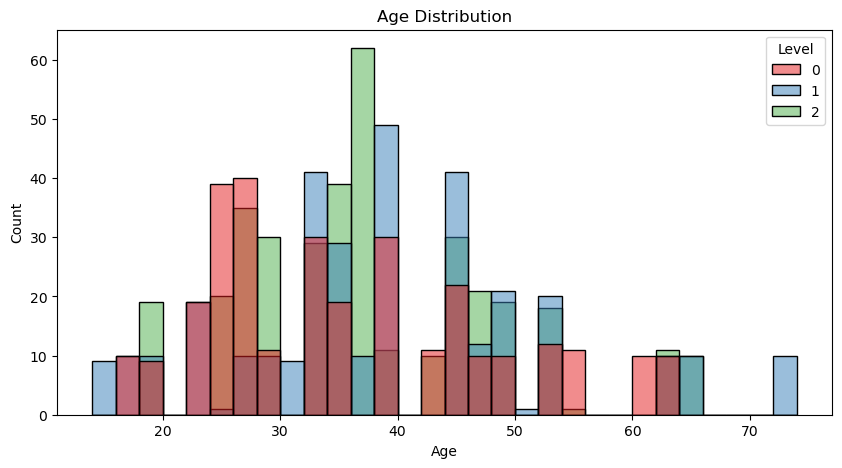

In [21]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="Age",hue="Level", binwidth=2,palette="Set1")

plt.title("Age Distribution")
plt.xlabel("Age")

Text(0.5, 0, 'Gender')

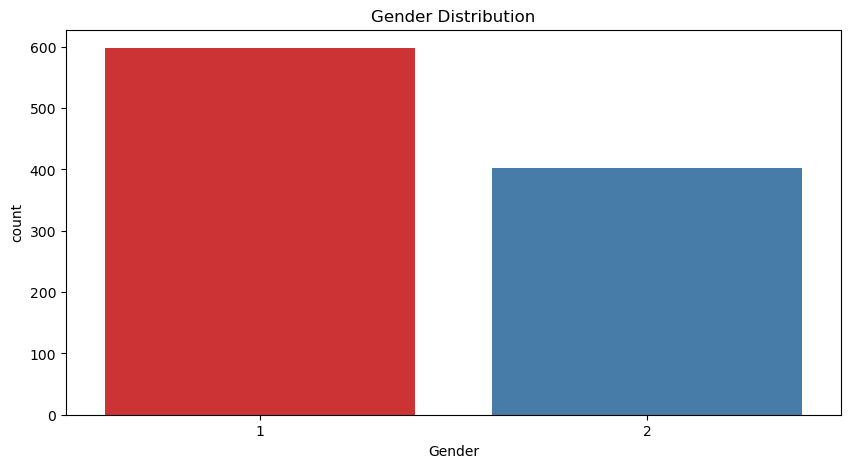

In [23]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x="Gender",palette="Set1")

plt.title("Gender Distribution")
plt.xlabel("Gender")

In [30]:
x = df.drop(df[["Gender","Level"]],axis=1)
y = df["Level"]

In [31]:
x

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4
1,17,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2
2,35,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
3,37,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
4,46,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3
996,37,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4
997,25,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
998,18,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3


In [39]:
def algo_test (x,y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    d=DecisionTreeClassifier()
    gb=GradientBoostingClassifier()
    rgc= RandomForestClassifier()
    xgb1= xgb.XGBClassifier()

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
    
    algos= [g,b,k,d,gb,rgc,xgb1]
    algo_names = ["GaussianNB","BernoulliNB","KNeighborsClassifier","DecisionTreeClassifier",
                 "GradientBoostingClassifier","RandomForestClassifier","Xgboost"]
                
    accuracy= []
    confusion = []
    fone=[]
    
    result = pd.DataFrame(columns=["Accuracy","Confusion","F1"],index = algo_names)
    
    for algo in algos:
        algo.fit(x_train,y_train)
        accuracy.append(accuracy_score(y_test,algo.predict(x_test)))
        confusion.append(confusion_matrix(y_test,algo.predict(x_test)))
        fone.append(f1_score(y_test, algo.predict(x_test), average=None))
       
    
     
        
    result.Accuracy = accuracy
    result.Confusion = confusion
    result.F1 = fone
   
    
    return result.sort_values("Accuracy", ascending=False)

In [40]:
algo_test(x,y)

,Accuracy,Confusion,F1
DecisionTreeClassifier,1.000,"[[55, 0, 0], [0, 63, 0], [0, 0, 82]]","[1.0, 1.0, 1.0]"
GradientBoostingClassifier,1.000,"[[55, 0, 0], [0, 63, 0], [0, 0, 82]]","[1.0, 1.0, 1.0]"
RandomForestClassifier,1.000,"[[55, 0, 0], [0, 63, 0], [0, 0, 82]]","[1.0, 1.0, 1.0]"
Xgboost,1.000,"[[55, 0, 0], [0, 63, 0], [0, 0, 82]]","[1.0, 1.0, 1.0]"
KNeighborsClassifier,0.995,"[[54, 1, 0], [0, 63, 0], [0, 0, 82]]","[0.9908256880733944, 0.9921259842519685, 1.0]"
GaussianNB,0.895,"[[47, 6, 2], [0, 53, 10], [0, 3, 79]]","[0.9215686274509803, 0.848, 0.9132947976878613]"
BernoulliNB,0.410,"[[0, 0, 55], [0, 0, 63], [0, 0, 82]]","[0.0, 0.0, 0.5815602836879432]"
